<a href="https://colab.research.google.com/github/bengisuycl/CMP719_TERM_PROJECT/blob/main/outputresult_bengisu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


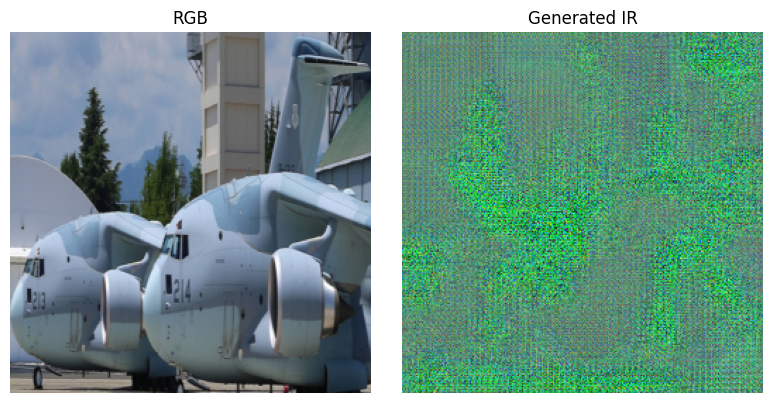

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# GPU varsa kullan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator mimarisi
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features)
        )
    def forward(self, x):
        return x + self.block(x)

class GeneratorResNet(nn.Module):
    def __init__(self, input_nc, output_nc, n_residual_blocks=9):
        super(GeneratorResNet, self).__init__()
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, 64, 7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        ]
        in_features = 64
        out_features = in_features * 2
        for _ in range(2):
            model += [
                nn.Conv2d(in_features, out_features, 3, stride=2, padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features * 2
        for _ in range(n_residual_blocks):
            model += [ResidualBlock(in_features)]
        out_features = in_features // 2
        for _ in range(2):
            model += [
                nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features // 2
        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, output_nc, 7),
            nn.Tanh()
        ]
        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

# Modeli yükle
G_AB = GeneratorResNet(input_nc=3, output_nc=3).to(device)
model_path = "/content/drive/MyDrive/MODEL_EPOCHS/G_AB_epoch13.pth"
G_AB.load_state_dict(torch.load(model_path, map_location=device), strict=False)
G_AB.eval()

# Transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Görüntü yolunu al
#image_path = "/content/drive/MyDrive/datasets/rgb2ir/testA/0c12d567552bb33d027d5d227dd3dbb1_0.jpg"
image_path = "/content/drive/MyDrive/datasets/rgb2ir/testA/0a48e8e9fdcd83da019b3992a9bc9f99_0.jpg"
#image_path = "/content/drive/MyDrive/datasets/rgb2ir/testB/ezgif-frame-012.png"

# Görüntüyü yükle ve transform et
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# IR üret
with torch.no_grad():
    fake_IR = G_AB(input_tensor)

# Görüntüleri dönüştür
def tensor_to_image(tensor):
    tensor = tensor.squeeze().detach().cpu()
    tensor = (tensor + 1) / 2
    return transforms.ToPILImage()(tensor)

fake_IR_image = tensor_to_image(fake_IR)
rgb_image = tensor_to_image(input_tensor)

# Görüntüleri yan yana göster
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("RGB")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Generated IR")
plt.imshow(fake_IR_image)
plt.axis('off')

plt.tight_layout()
plt.show()


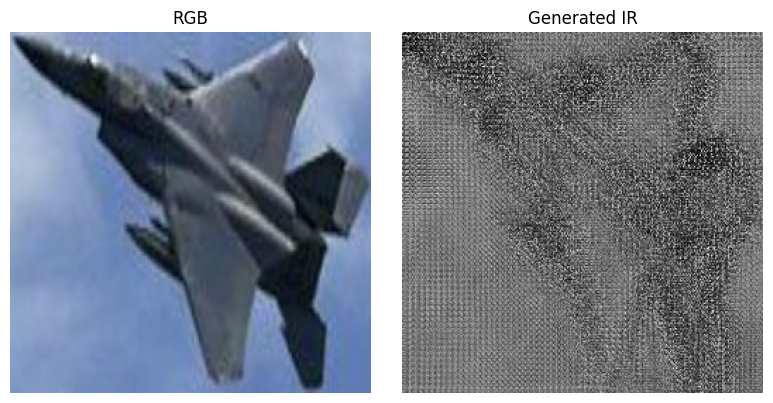

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# GPU varsa kullan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator mimarisi
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features)
        )
    def forward(self, x):
        return x + self.block(x)

class GeneratorResNet(nn.Module):
    def __init__(self, input_nc, output_nc, n_residual_blocks=9):
        super(GeneratorResNet, self).__init__()
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, 64, 7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        ]
        in_features = 64
        out_features = in_features * 2
        for _ in range(2):
            model += [
                nn.Conv2d(in_features, out_features, 3, stride=2, padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features * 2
        for _ in range(n_residual_blocks):
            model += [ResidualBlock(in_features)]
        out_features = in_features // 2
        for _ in range(2):
            model += [
                nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features // 2
        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, output_nc, 7),
            nn.Tanh()
        ]
        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

# Modeli yükle
G_AB = GeneratorResNet(input_nc=3, output_nc=1).to(device)
model_path = "/content/drive/MyDrive/MODEL_EPOCHS/G_AB_epoch13.pth"
G_AB.load_state_dict(torch.load(model_path, map_location=device), strict=False)
G_AB.eval()

# Transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Görüntü yolu
image_path = image_path = "/content/drive/MyDrive/datasets/rgb2ir/testA/0c12d567552bb33d027d5d227dd3dbb1_0.jpg"

# Görüntüyü yükle ve transform et
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# IR üret
with torch.no_grad():
    fake_IR = G_AB(input_tensor)

# Tensor'dan görsel oluşturma
def tensor_to_image(tensor):
    tensor = tensor.squeeze().detach().cpu()
    tensor = (tensor + 1) / 2
    np_image = tensor.numpy()
    if np_image.ndim == 2:
        return Image.fromarray((np_image * 255).astype("uint8"))
    else:
        return transforms.ToPILImage()(tensor)

fake_IR_image = fake_IR[0,0,:,:].cpu().numpy()  # IR tek kanal
rgb_image = tensor_to_image(input_tensor)

# Görüntüleri yan yana göster
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("RGB")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Generated IR")
plt.imshow(fake_IR_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


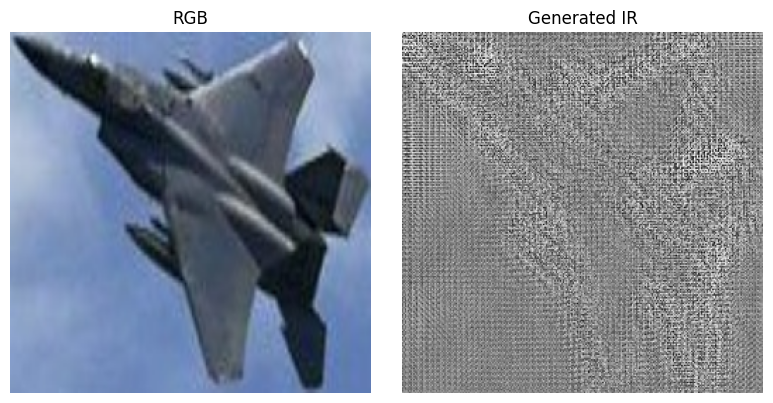

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# GPU varsa kullan
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generator mimarisi
class ResidualBlock(nn.Module):
    def __init__(self, in_features):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features),
            nn.ReLU(inplace=True),
            nn.ReflectionPad2d(1),
            nn.Conv2d(in_features, in_features, 3),
            nn.InstanceNorm2d(in_features)
        )
    def forward(self, x):
        return x + self.block(x)

class GeneratorResNet(nn.Module):
    def __init__(self, input_nc, output_nc, n_residual_blocks=9):
        super(GeneratorResNet, self).__init__()
        model = [
            nn.ReflectionPad2d(3),
            nn.Conv2d(input_nc, 64, 7),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True)
        ]
        in_features = 64
        out_features = in_features * 2
        for _ in range(2):
            model += [
                nn.Conv2d(in_features, out_features, 3, stride=2, padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features * 2
        for _ in range(n_residual_blocks):
            model += [ResidualBlock(in_features)]
        out_features = in_features // 2
        for _ in range(2):
            model += [
                nn.ConvTranspose2d(in_features, out_features, 3, stride=2, padding=1, output_padding=1),
                nn.InstanceNorm2d(out_features),
                nn.ReLU(inplace=True)
            ]
            in_features = out_features
            out_features = in_features // 2
        model += [
            nn.ReflectionPad2d(3),
            nn.Conv2d(64, output_nc, 7),
            nn.Tanh()
        ]
        self.model = nn.Sequential(*model)

    def forward(self, x):
        return self.model(x)

# Modeli yükle
G_AB = GeneratorResNet(input_nc=3, output_nc=1).to(device)
model_path = "/content/drive/MyDrive/MODEL_EPOCHS/G_AB_epoch99.pth"
G_AB.load_state_dict(torch.load(model_path, map_location=device), strict=False)
G_AB.eval()

# Transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Görüntü yolu
image_path = image_path = "/content/drive/MyDrive/datasets/rgb2ir/testA/0c12d567552bb33d027d5d227dd3dbb1_0.jpg"

# Görüntüyü yükle ve transform et
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# IR üret
with torch.no_grad():
    fake_IR = G_AB(input_tensor)

# Tensor'dan görsel oluşturma
def tensor_to_image(tensor):
    tensor = tensor.squeeze().detach().cpu()
    tensor = (tensor + 1) / 2
    np_image = tensor.numpy()
    if np_image.ndim == 2:
        return Image.fromarray((np_image * 255).astype("uint8"))
    else:
        return transforms.ToPILImage()(tensor)

fake_IR_image = fake_IR[0,0,:,:].cpu().numpy()  # IR tek kanal
rgb_image = tensor_to_image(input_tensor)

# Görüntüleri yan yana göster
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("RGB")
plt.imshow(rgb_image)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Generated IR")
plt.imshow(fake_IR_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
